In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the data

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
data = data[data['smoking_history']!='No Info']
data['smoking_history'].unique()

array(['never', 'current', 'former', 'ever', 'not current'], dtype=object)

In [7]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
# data['gender'] = data['gender'].map({'Male':0,'Female':1,'Other':2})

In [9]:
# data = data[data['gender']!=2]
# data['gender'].unique()

### Data Visualization

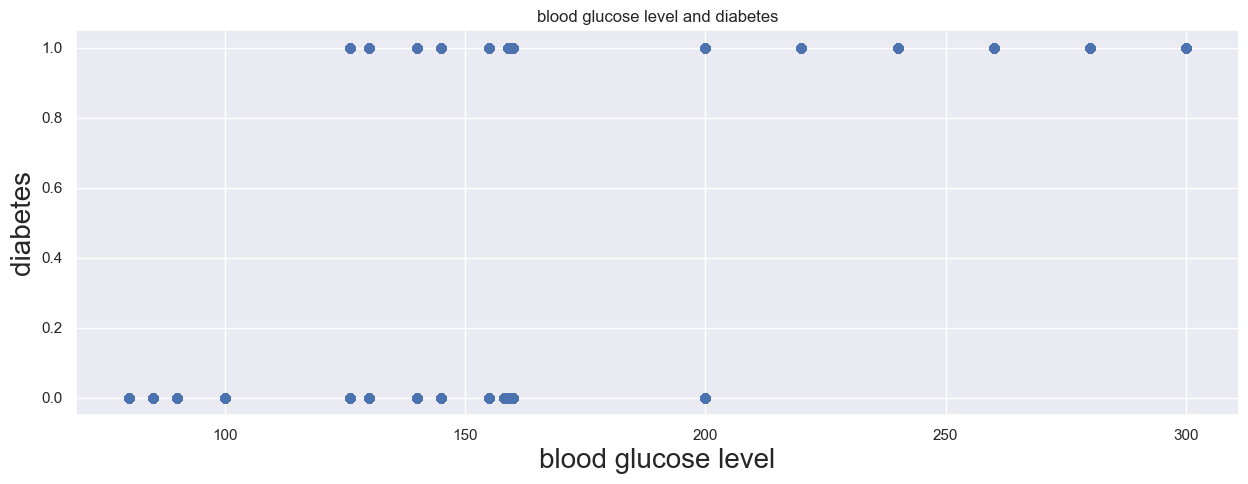

In [10]:
plt.figure(figsize=(15,5))
plt.scatter(data['blood_glucose_level'],data['diabetes'])
plt.xlabel('blood glucose level',fontsize=20)
plt.ylabel('diabetes',fontsize=20)
plt.title('blood glucose level and diabetes')
plt.show()

In [11]:
total_diabetes_patient = (data['diabetes']==1).sum()
total_diabetes_patient

7046

In [12]:
total_diabetes_patient = data['diabetes'].value_counts()
total_diabetes_patient

diabetes
0    57138
1     7046
Name: count, dtype: int64

In [13]:
data.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


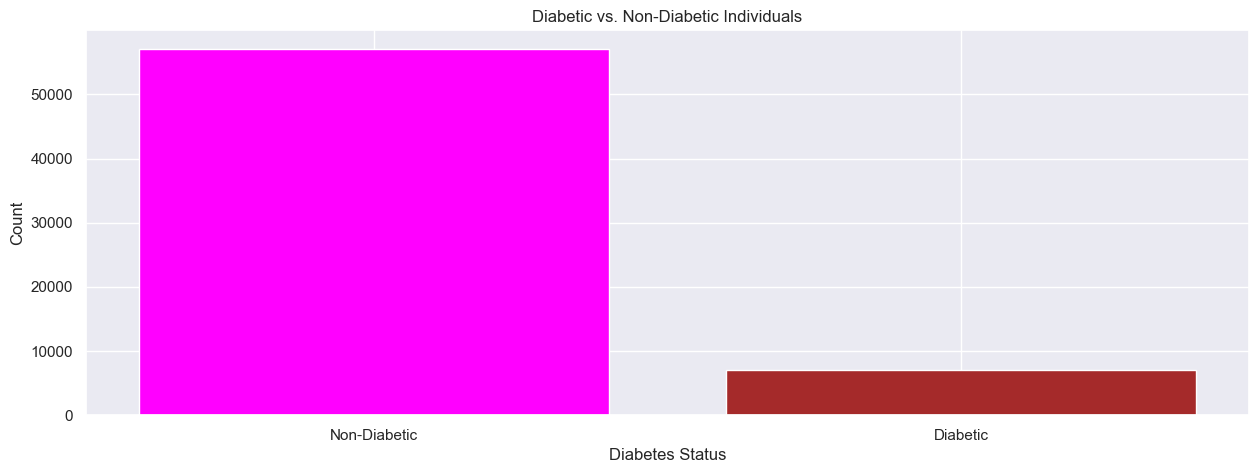

In [14]:
# diabetic = (data['diabetes']==1).sum()
# nondiabetic = (data['diabetes']==0).sum()
# plt.figure(figsize=(15,5))
# plt.bar(diabetic,nondiabetic)
# plt.show()

diabetes_counts = data['diabetes'].value_counts()

# Plotting
plt.figure(figsize=(15,5))
plt.bar(['Non-Diabetic', 'Diabetic'], diabetes_counts, color=['magenta', 'brown'])
plt.title('Diabetic vs. Non-Diabetic Individuals')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

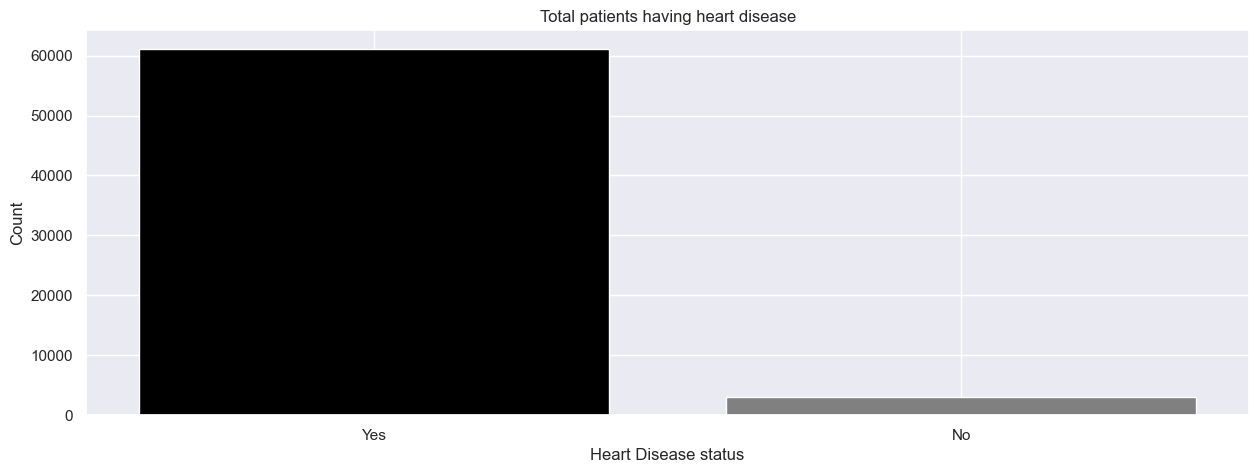

In [15]:
heartdiseasecounts = data['heart_disease'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(['Yes','No'],heartdiseasecounts,color=['black','grey'])
plt.title('Total patients having heart disease')
plt.xlabel('Heart Disease status')
plt.ylabel('Count')
plt.show()

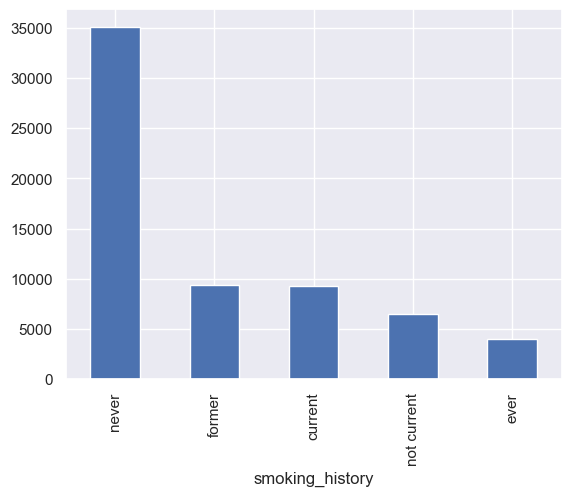

In [16]:
data.smoking_history.value_counts().plot(kind='bar')
plt.show()

In [17]:
data.gender.value_counts()

gender
Female    38852
Male      25320
Other        12
Name: count, dtype: int64

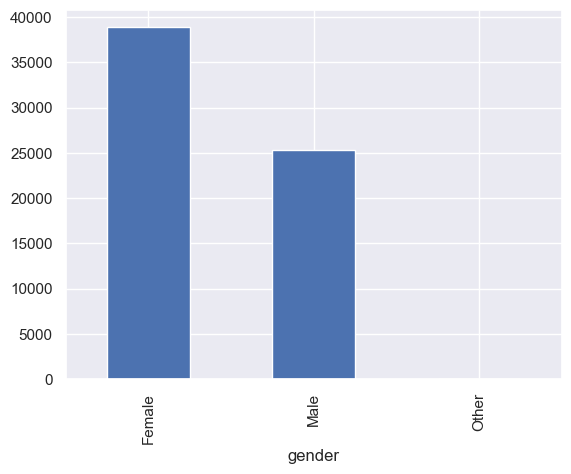

In [18]:
data.gender.value_counts().plot(kind='bar')
plt.show()

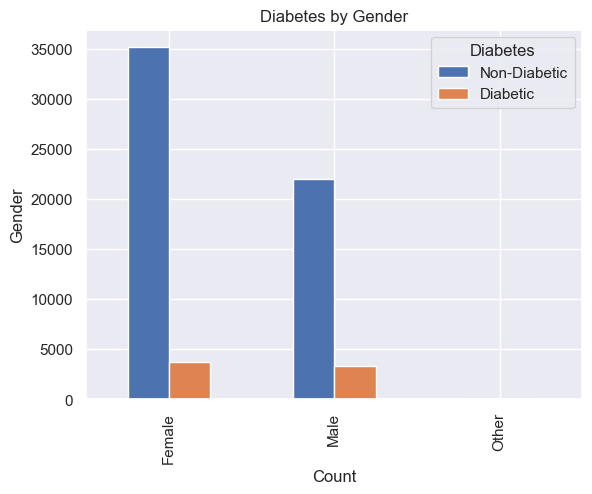

In [19]:
diabetes_by_gender = data.groupby(['gender', 'diabetes']).size().unstack()

# Plotting
diabetes_by_gender.plot(kind='bar')
plt.title('Diabetes by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='Diabetes', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

In [20]:
newdata = data.copy()
newdata = newdata[['heart_disease','bmi','blood_glucose_level','diabetes']]
newdata.head()

,heart_disease,bmi,blood_glucose_level,diabetes
0,1,25.19,140,0
2,0,27.32,158,0
3,0,23.45,155,0
4,1,20.14,155,0
5,0,27.32,85,0


In [21]:
filteredglucose = data[data['blood_glucose_level']<210]
data = filteredglucose.copy()

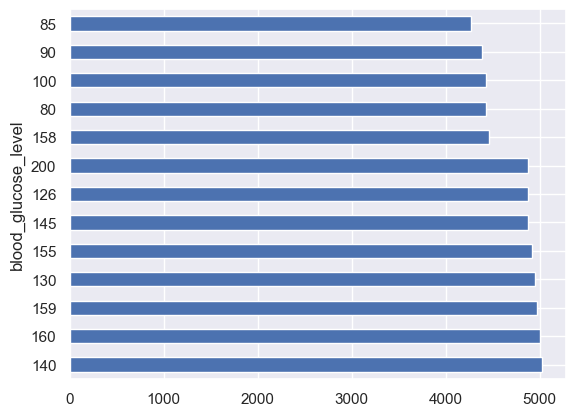

In [22]:
data.blood_glucose_level.value_counts().plot(kind='barh')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [24]:
lbl = LabelEncoder()

In [25]:
encodeddata = newdata.copy()
encodeddata[['heart_disease','bmi','blood_glucose_level','diabetes']] = encodeddata[['heart_disease','bmi','blood_glucose_level','diabetes']].apply(lambda x:lbl.fit_transform(x))

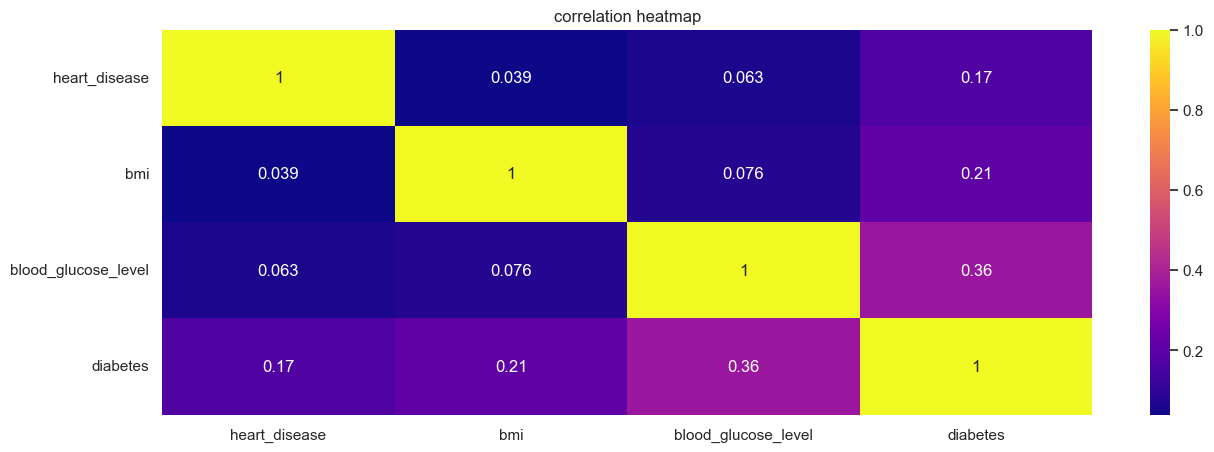

In [26]:
corr_matrix = encodeddata.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix,annot=True,cmap='plasma')
plt.title('correlation heatmap')
plt.show()

In [27]:
y=encodeddata['diabetes']
x=encodeddata.drop(columns={'diabetes'})

### Splitting the data for training and testing

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

### Training the model using Linear regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(xtrain,ytrain)

LinearRegression()

### Testing the data using Linear Regression

In [33]:
predictions=model.predict(xtest)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,classification_report

In [35]:
r2score=r2_score(ytest,predictions)

In [36]:
r2score

0.17546084560940134

### Testing using KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=4)

In [39]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [40]:
predictions=knn.predict(xtest)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
r2score = r2_score(ytest,predictions)
r2score

0.1269138431000737

In [42]:
accuracy = accuracy_score(ytest,predictions)
print('Accuracy: ',accuracy*100)

Accuracy:  91.3998597803225


In [43]:
compareknn = pd.DataFrame({'Actual diabetes':ytest,'Predicted':predictions})

### Testing using Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfclass = RandomForestClassifier(n_estimators=100,random_state=42)

In [46]:
rfclass.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [47]:
predictions = rfclass.predict(xtest)

In [48]:
accuracy = accuracy_score(ytest,predictions)
accuracy*100

91.01036067617045

In [49]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11415
           1       0.63      0.46      0.53      1422

    accuracy                           0.91     12837
   macro avg       0.78      0.71      0.74     12837
weighted avg       0.90      0.91      0.90     12837



### Testing using Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier 

In [51]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

In [52]:
predictions=dt.predict(xtest)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
accuracy = accuracy_score(ytest,predictions)
accuracy*100

90.924670873257

In [54]:
print('classification report' , classification_report(ytest,predictions))

classification report               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11415
           1       0.62      0.46      0.53      1422

    accuracy                           0.91     12837
   macro avg       0.78      0.71      0.74     12837
weighted avg       0.90      0.91      0.90     12837



### Tesing Using Ada Boost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
ada = AdaBoostClassifier(n_estimators=50,random_state=42)
ada.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=42)

In [88]:
predictions = ada.predict(xtest)

In [89]:
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [90]:
accuracy = accuracy_score(ytest,predictions)

In [91]:
accuracy*100

93.16818571317286

### Classification Report

In [92]:
print('classification report : ' , classification_report(ytest,predictions))

classification report :                precision    recall  f1-score   support

           0       0.93      1.00      0.96     11415
           1       0.94      0.41      0.57      1422

    accuracy                           0.93     12837
   macro avg       0.94      0.70      0.77     12837
weighted avg       0.93      0.93      0.92     12837

